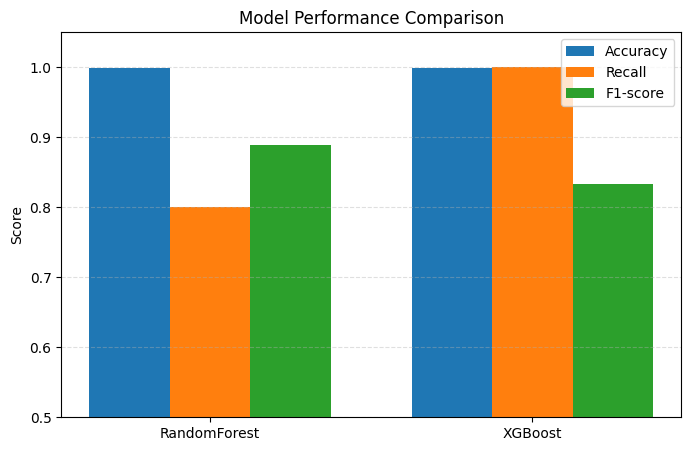

In [7]:
import matplotlib.pyplot as plt
import numpy as np


models = ["RandomForest", "XGBoost"]

accuracy = [0.999421, 0.998843]
recall   = [0.800000, 1.000000]
f1_score = [0.888889, 0.833333]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x - width, accuracy, width, label="Accuracy")
plt.bar(x, recall, width, label="Recall")
plt.bar(x + width, f1_score, width, label="F1-score")

plt.xticks(x, models)
plt.ylim(0.5, 1.05)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

In [8]:
import joblib
import pandas as pd

# Load processed dataset
df = pd.read_csv("../data/processed/industrial_sensor_cleaned.csv")

# Prepare X and y again
feature_cols = [
    "temperature", "vibration", "pressure", "speed",
    "temp_roll_mean", "vib_roll_std",
    "temp_diff", "pressure_diff",
    "time_since_last_maint"
]
X = df[feature_cols]
y = df["maintenance_flag"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Load trained models
rf_model = joblib.load("../models/random_forest_model.pkl")
xgb_model = joblib.load("../models/xgboost_model.pkl")

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

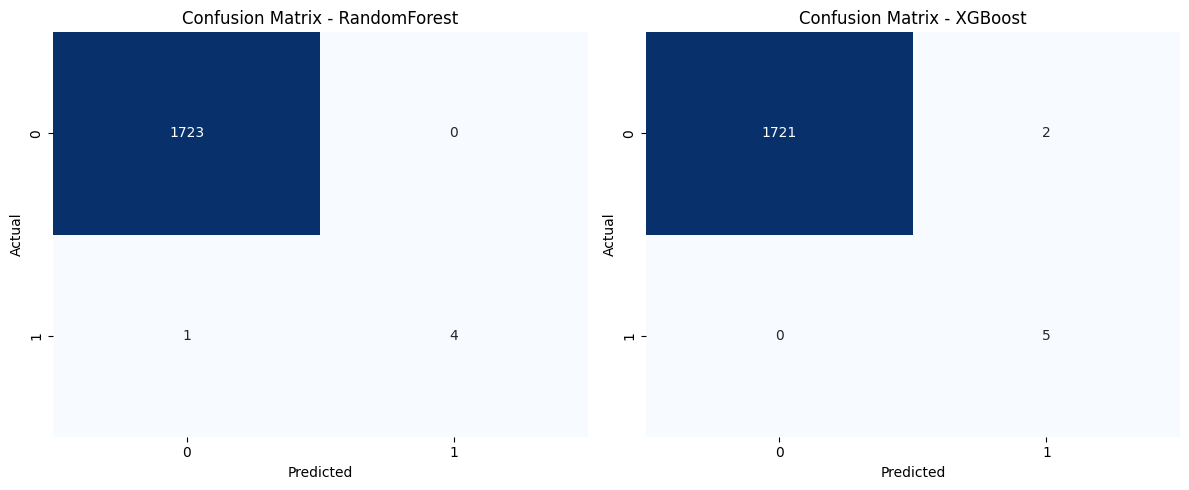

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "RandomForest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

plt.figure(figsize=(12,5))

for i, (name, pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, pred)
    
    plt.subplot(1, 2, i+1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [12]:
import joblib
import pandas as pd

# Load processed test data
X_test = joblib.load("../models/X_test.pkl")
y_test = joblib.load("../models/y_test.pkl")

# Load trained models
rf_model = joblib.load("../models/random_forest_model.pkl")
xgb_model = joblib.load("../models/xgboost_model.pkl")

print("Models and test data loaded successfully!")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Models and test data loaded successfully!
X_test shape: (1728, 9)
y_test shape: (1728,)


In [13]:
from sklearn.metrics import roc_auc_score

# Predict probabilities
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("RF AUC:", roc_auc_score(y_test, y_proba_rf))
print("XGB AUC:", roc_auc_score(y_test, y_proba_xgb))

RF AUC: 1.0
XGB AUC: 1.0


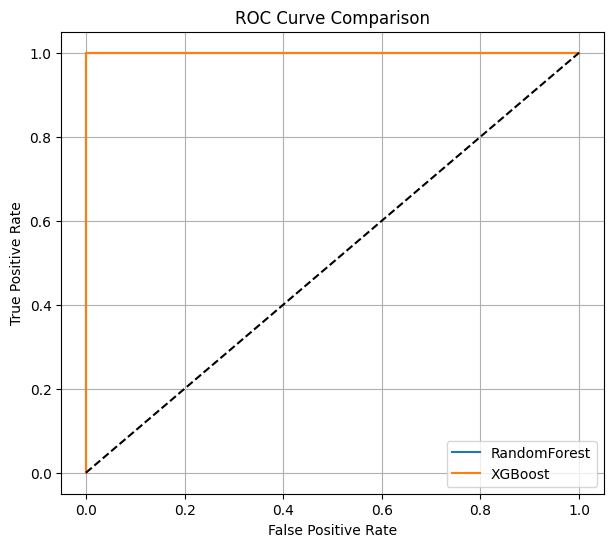

In [14]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# RF ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# XGB ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, label="RandomForest")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()